# Tiktok Project Course 6 Part 2

**=================================================================================================================**

## Project Description

The data team at TikTok are close to completing the claims classification project. Earlier, the data team completed a project proposal, and used Python to explore and analyze the claims dataset, created data visualizations, and conducted a statistical test. Most recently, the team built a logistic regression model to predict whether statements are claims or opinions within submissions, based on the ‘verified_status’ variable within the claims dataset. 

Operations Manager, Maika Abadi mentioned that there are some questions from stakeholders in other departments, which he would like to share before the process of building the final begins.

Data Science Lead, Willow Jaffey determined that an effective final model could be approached in several ways, such as Naive Bayes or tree-based models. However, Willow and the team have decided to develop a random forest model during the evaluation stage for this project. 

## Data sources used

This project uses a dataset called tiktok_dataset.csv. It contains synthetic data created for this project in partnership with TikTok.

## Business Task

Once complete, please send an executive summary of your random forest model and results to Rosie Mae and myself so we can prepare to present the results to the leadership team. Be sure to include what was requested in the email from Mary Joanna, a summary of the variables used to make the prediction, and an idea of the accuracy of the model.

## Data Tasks

- Load Data
- Perform GridSearchCV or RandomSearch CV
- Apply best hyperparameters into model
- Evaluate the model
- Perform Cross Validation
- Record results

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta, date


import scipy.stats
from scipy.stats import zscore
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
# from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
# from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
# from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance, plot_partial_dependence

from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, jaccard_score
from sklearn.metrics import log_loss


from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#import imblearn
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load


# PyCaret
#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Ensure results are reproducible
random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Data Quick Glance

In [2]:
df = pd.read_csv("tiktoksmenn.csv")

In [3]:
df.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.10,0.69,-0.21,1.91,2.04,1,0,0
1,0.20,-0.42,-0.44,-0.40,0.07,1,1,0
2,-0.53,-0.50,-0.49,-0.48,-1.99,1,1,0
3,-0.56,-0.50,-0.47,-0.46,0.84,1,1,0
4,-0.56,-0.50,-0.49,-0.49,-1.56,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25337 entries, 0 to 25336
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   videoviewcount      25337 non-null  float64
 1   videolikecount      25337 non-null  float64
 2   videosharecount     25337 non-null  float64
 3   videodownloadcount  25337 non-null  float64
 4   textlength          25337 non-null  float64
 5   claimstatus         25337 non-null  int64  
 6   banactive           25337 non-null  int64  
 7   verifiedstatus      25337 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.5 MB


In [5]:
df.dtypes.value_counts()

float64    5
int64      3
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
count,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00,25337.00
mean,0.04,0.02,0.04,0.02,-0.00,0.23,0.87,0.46
std,1.03,1.00,1.03,1.02,0.99,0.42,0.33,0.50
min,-0.57,-0.51,-0.49,-0.49,-2.72,0.00,0.00,0.00
25%,-0.55,-0.50,-0.48,-0.48,-0.70,0.00,1.00,0.00
50%,-0.53,-0.48,-0.45,-0.45,-0.10,0.00,1.00,0.00
75%,0.26,0.11,-0.03,-0.03,0.60,0.00,1.00,1.00
max,3.64,5.83,4.79,5.38,4.54,1.00,1.00,1.00


In [7]:
df.shape

(25337, 8)

In [8]:
df.columns

Index(['videoviewcount', 'videolikecount', 'videosharecount', 'videodownloadcount', 'textlength', 'claimstatus', 'banactive', 'verifiedstatus'], dtype='object')

In [9]:
# Check class balance
df['verifiedstatus'].value_counts().to_frame()

,verifiedstatus
0,13747
1,11590


**=================================================================================================================**

## Data Visualization

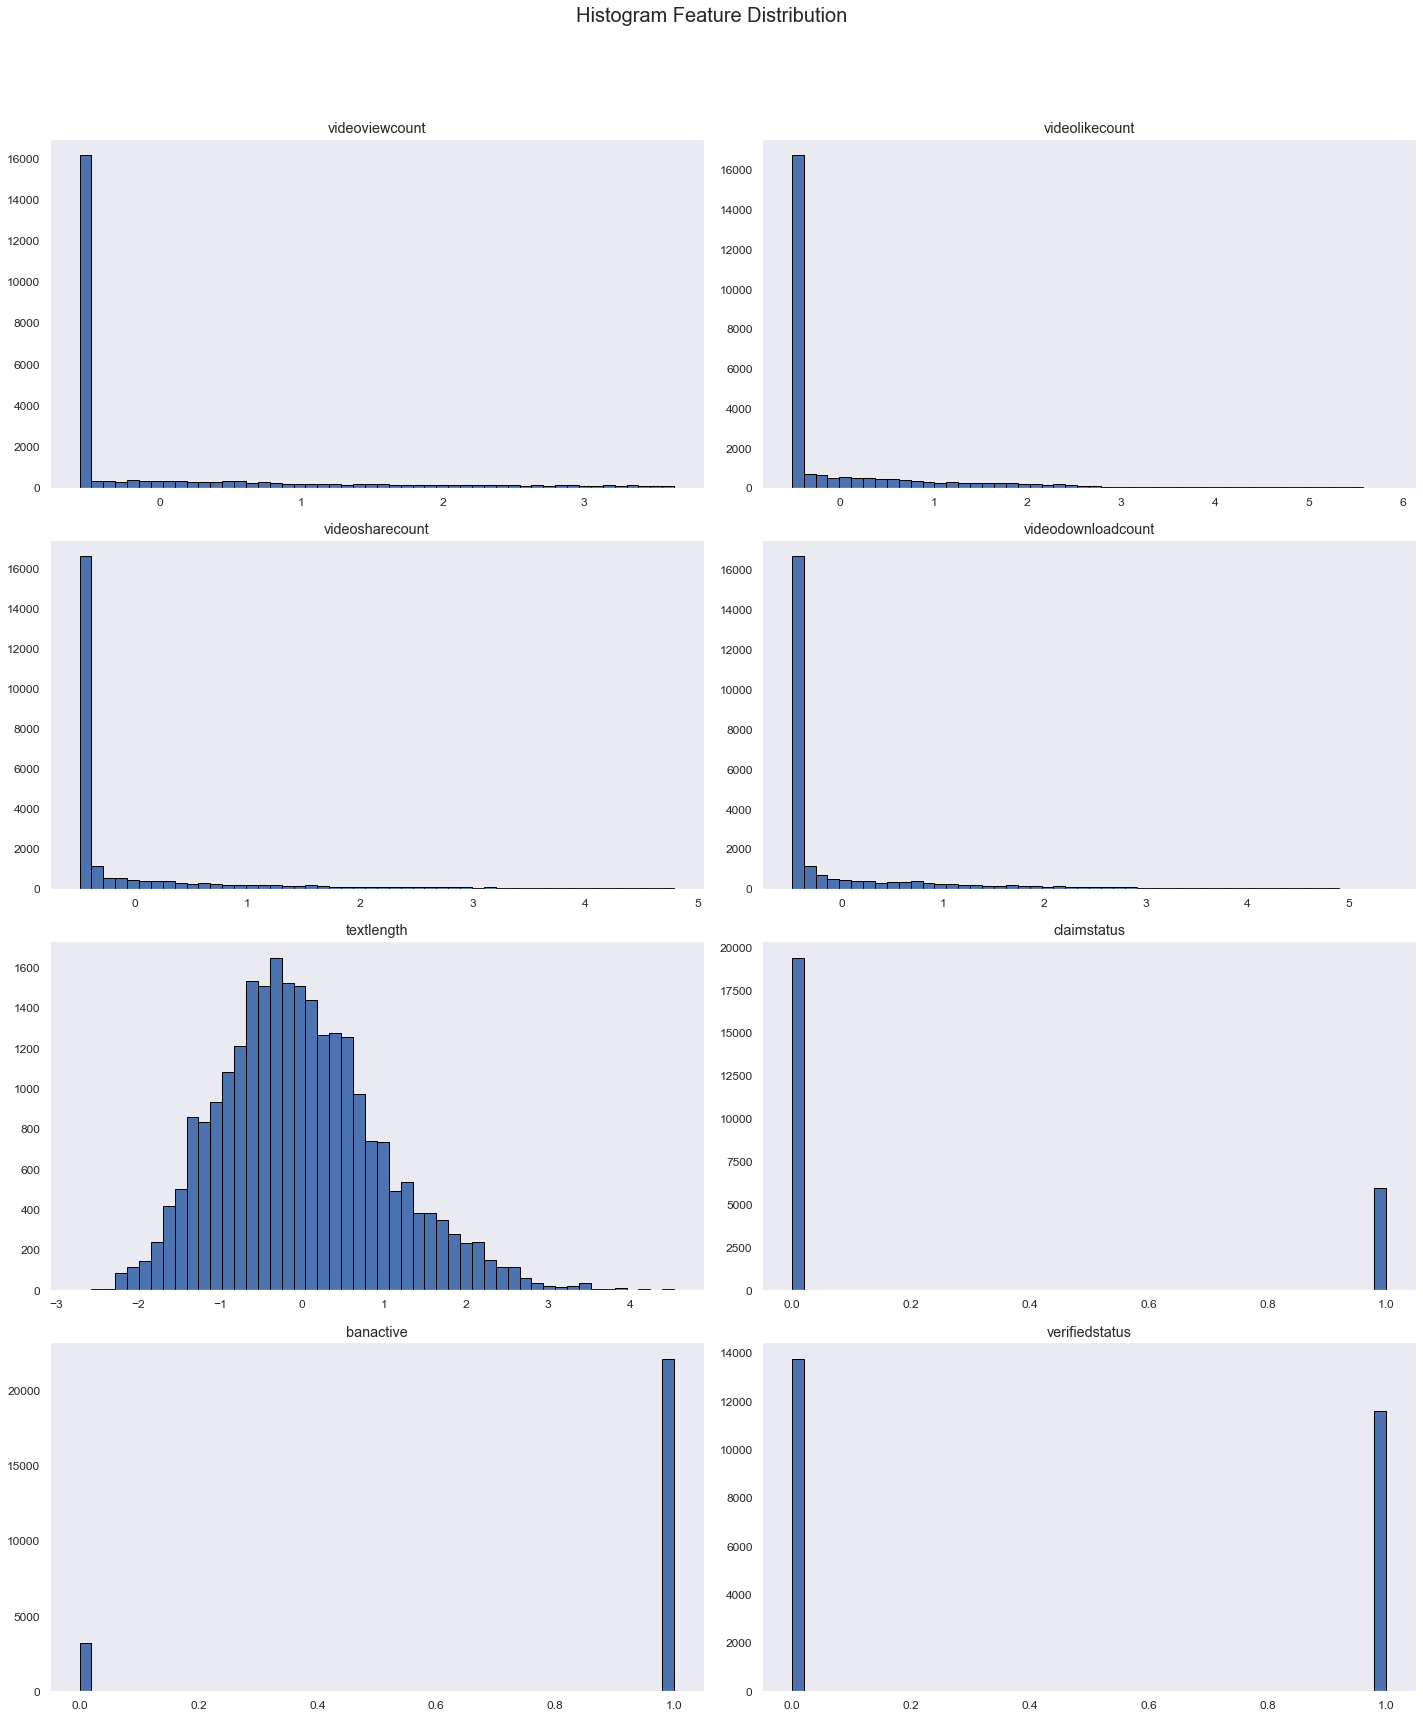

In [10]:
df.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

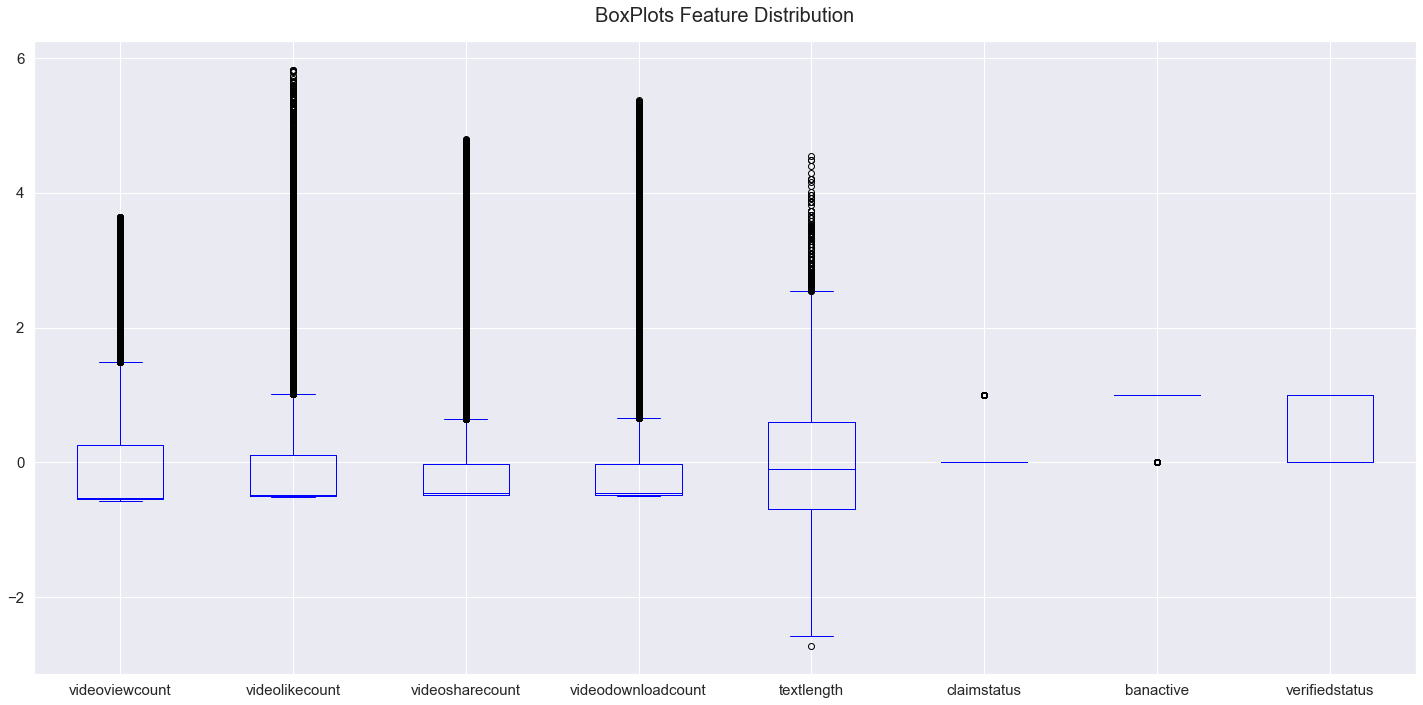

In [11]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

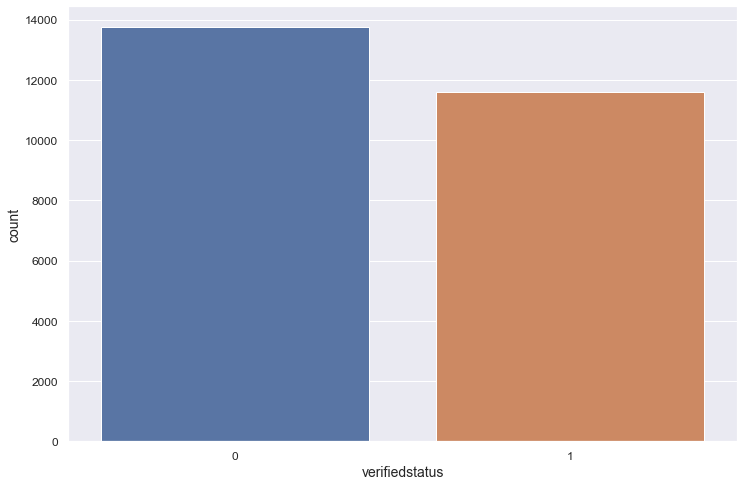

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df.verifiedstatus, data=df)
plt.show()

In [13]:
df.corr()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
videoviewcount,1.00,0.68,0.58,0.58,0.22,-0.04,0.02,0.04
videolikecount,0.68,1.00,0.79,0.76,0.19,-0.03,0.00,0.02
videosharecount,0.58,0.79,1.00,0.66,0.19,-0.04,-0.01,0.04
videodownloadcount,0.58,0.76,0.66,1.00,0.20,-0.03,0.01,0.02
textlength,0.22,0.19,0.19,0.20,1.00,0.01,-0.02,0.00
claimstatus,-0.04,-0.03,-0.04,-0.03,0.01,1.00,-0.29,-0.38
banactive,0.02,0.00,-0.01,0.01,-0.02,-0.29,1.00,0.12
verifiedstatus,0.04,0.02,0.04,0.02,0.00,-0.38,0.12,1.00


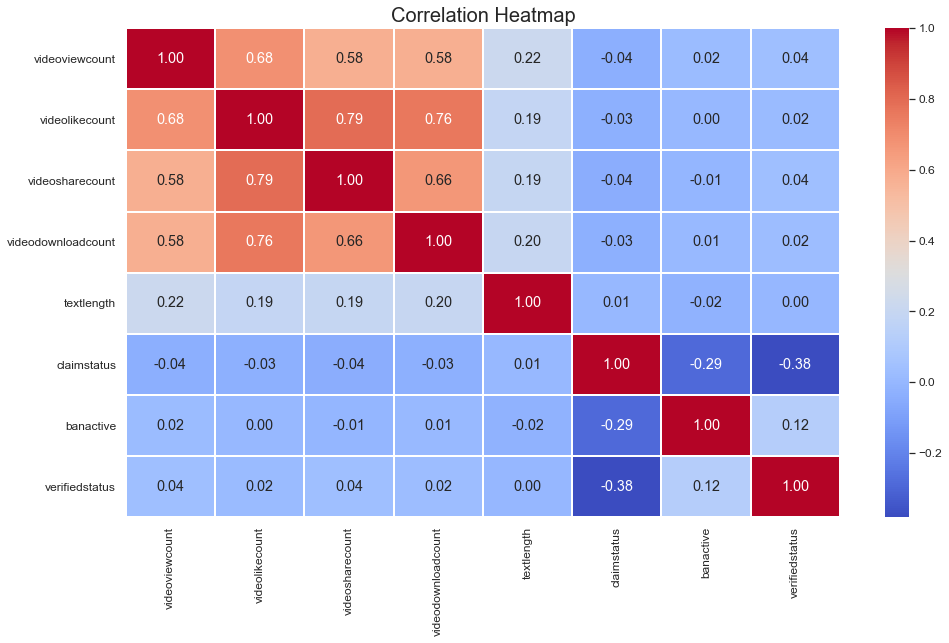

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Create a small dataset

In [15]:
df = df.sample(frac=0.35)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.head()

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.53,-0.51,-0.48,-0.49,-0.84,0,1,0
1,-0.55,-0.51,-0.47,-0.49,-0.60,0,1,0
2,-0.54,-0.49,-0.45,-0.48,-0.60,1,1,0
3,0.30,0.20,0.35,-0.21,0.02,0,1,0
4,-0.53,-0.44,-0.43,-0.37,-0.89,0,1,0


In [18]:
df.shape

(8868, 8)

**=================================================================================================================**

## Create a random dataset for Hyperparameter Tuning

In [19]:
df

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.53,-0.51,-0.48,-0.49,-0.84,0,1,0
1,-0.55,-0.51,-0.47,-0.49,-0.60,0,1,0
2,-0.54,-0.49,-0.45,-0.48,-0.60,1,1,0
3,0.30,0.20,0.35,-0.21,0.02,0,1,0
4,-0.53,-0.44,-0.43,-0.37,-0.89,0,1,0
...,...,...,...,...,...,...,...,...
8863,-0.56,-0.51,-0.49,-0.49,-0.70,0,1,0
8864,-0.54,-0.49,-0.45,-0.47,-0.75,1,1,0
8865,0.50,2.91,1.35,3.83,0.26,1,1,0
8866,3.37,4.26,1.93,1.78,1.18,1,1,0


In [20]:
df_random = df.sample(n=1500)

In [21]:
df_random.shape

(1500, 8)

In [22]:
X_random = df_random.iloc[:,:7]
y_random = df_random.iloc[:,7:]

In [23]:
X_random.values, y_random.values

(array([[-0.54841614, -0.48200091, -0.47317149, ...,  0.31192927,
          0.        ,  1.        ],
        [-0.53098007, -0.4774266 , -0.41422365, ..., -0.50495418,
          0.        ,  1.        ],
        [ 2.37466083,  1.02607847, -0.00338461, ...,  0.93660485,
          0.        ,  1.        ],
        ...,
        [-0.55416345, -0.49855229, -0.46460271, ..., -0.60105812,
          0.        ,  1.        ],
        [ 2.09304798,  1.27804866,  1.10060441, ...,  0.75178083,
          0.        ,  1.        ],
        [-0.52809616, -0.44071817, -0.41468985, ..., -0.88936993,
          0.        ,  0.        ]]),
 array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]], dtype=int64))

In [24]:
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=0, stratify=y_random)

In [25]:
X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape

((1200, 7), (300, 7), (1200, 1), (300, 1))

**=================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [26]:
df.shape

(8868, 8)

In [27]:
df.head(1)

,videoviewcount,videolikecount,videosharecount,videodownloadcount,textlength,claimstatus,banactive,verifiedstatus
0,-0.53,-0.51,-0.48,-0.49,-0.84,0,1,0


In [28]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [29]:
X.values, y.values

(array([[-0.52572513, -0.50587718, -0.48333785, ..., -0.84131796,
          0.        ,  1.        ],
        [-0.54589151, -0.50587718, -0.47261525, ..., -0.60105812,
          0.        ,  1.        ],
        [-0.54079211, -0.48547904, -0.45431688, ..., -0.60105812,
          1.        ,  1.        ],
        ...,
        [ 0.49903996,  2.90823296,  1.353608  , ...,  0.2638773 ,
          1.        ,  1.        ],
        [ 3.37388267,  4.26204897,  1.92901576, ...,  1.17686469,
          1.        ,  1.        ],
        [-0.56157648, -0.51224518, -0.48776676, ..., -0.64911009,
          1.        ,  1.        ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7094, 7), (1774, 7), (7094,), (1774,))

**=================================================================================================================**

# Model Training

## Decision Tree

### Using RandomSearchCV

Randomised grid search is very useful in finding near-optimal hyper parameters for any machine learning models.

Rules of thumb: with 60 iterations, 95% of the time, best 5% sets of parameters can be found, regardless of grid size.

In [32]:
dt = DecisionTreeClassifier(random_state=0)

In [33]:
parameters = { 'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': np.arange(2,11,2),
               'min_samples_split': np.arange(2,21,3),
               'min_samples_leaf':np.arange(1,11,2)
             }

In [34]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [35]:
dt_randm = RandomizedSearchCV(estimator=dt, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc', return_train_score=True)

In [36]:
%%time
dt_randm.fit(X_random_train, y_random_train)

CPU times: total: 188 ms
Wall time: 5.47 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=55, n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20])},
                   refit='roc_auc', return_train_score=True,
                   scoring={'f1', 'precision', 'recall', 'roc_auc', 'accuracy'})

In [37]:
dt_randm.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=11, random_state=0)

In [38]:
dt_randm.best_score_

0.7126153315656291

In [39]:
dt_randm.best_params_

{'min_samples_split': 11,
 'min_samples_leaf': 3,
 'max_depth': 8,
 'criterion': 'entropy'}

In [40]:
# we also find the data for all models evaluated

results = pd.DataFrame(dt_randm.cv_results_)

print(results.shape)

results.head()

(55, 84)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.01,0.01,0.01,0.01,17,7,2,gini,"{'min_samples_split': 17, 'min_samples_leaf': ...",0.71,0.73,0.73,0.72,0.71,0.72,0.01,3,0.73,0.72,0.73,0.73,0.73,0.73,0.00,0.58,0.62,0.59,0.61,0.58,0.60,0.02,29,0.60,0.60,0.60,0.61,0.59,0.60,0.00,0.92,0.89,0.96,0.89,0.90,0.91,0.03,3,0.93,0.90,0.93,0.90,0.95,0.92,0.02,0.66,0.71,0.67,0.69,0.65,0.68,0.02,29,0.69,0.69,0.68,0.69,0.68,0.69,0.00,0.65,0.69,0.66,0.67,0.64,0.66,0.02,6,0.67,0.67,0.67,0.67,0.67,0.67,0.00
1,0.00,0.00,0.01,0.01,5,9,2,gini,"{'min_samples_split': 5, 'min_samples_leaf': 9...",0.71,0.73,0.73,0.72,0.71,0.72,0.01,3,0.73,0.72,0.73,0.73,0.73,0.73,0.00,0.58,0.62,0.59,0.61,0.58,0.60,0.02,29,0.60,0.60,0.60,0.61,0.59,0.60,0.00,0.92,0.89,0.96,0.89,0.90,0.91,0.03,3,0.93,0.90,0.93,0.90,0.95,0.92,0.02,0.66,0.71,0.67,0.69,0.65,0.68,0.02,29,0.69,0.69,0.68,0.69,0.68,0.69,0.00,0.65,0.69,0.66,0.67,0.64,0.66,0.02,6,0.67,0.67,0.67,0.67,0.67,0.67,0.00
2,0.01,0.00,0.00,0.00,11,7,4,log_loss,"{'min_samples_split': 11, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.00,0.01,0.01,2,5,10,gini,"{'min_samples_split': 2, 'min_samples_leaf': 5...",0.64,0.68,0.65,0.55,0.67,0.64,0.05,31,0.78,0.81,0.77,0.81,0.81,0.80,0.02,0.63,0.65,0.69,0.56,0.59,0.62,0.04,7,0.76,0.76,0.81,0.77,0.73,0.77,0.03,0.66,0.70,0.63,0.54,0.76,0.66,0.08,34,0.81,0.87,0.74,0.84,0.92,0.83,0.06,0.70,0.73,0.73,0.61,0.68,0.69,0.04,20,0.89,0.91,0.89,0.90,0.89,0.89,0.01,0.65,0.68,0.68,0.57,0.64,0.64,0.04,28,0.79,0.81,0.79,0.81,0.80,0.80,0.01
4,0.01,0.00,0.01,0.00,5,1,6,gini,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.68,0.67,0.55,0.66,0.70,0.66,0.05,25,0.76,0.75,0.68,0.78,0.77,0.75,0.04,0.59,0.64,0.63,0.59,0.58,0.60,0.03,17,0.66,0.69,0.75,0.68,0.63,0.68,0.04,0.82,0.71,0.50,0.77,0.90,0.74,0.14,20,0.90,0.82,0.62,0.91,0.98,0.85,0.13,0.67,0.72,0.69,0.64,0.68,0.68,0.03,24,0.80,0.82,0.80,0.82,0.79,0.81,0.01,0.64,0.67,0.62,0.63,0.64,0.64,0.02,32,0.73,0.74,0.72,0.75,0.71,0.73,0.01


In [41]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_min_samples_split","param_max_depth","param_min_samples_leaf","mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_min_samples_split,param_max_depth,param_min_samples_leaf,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,11,8,3,0.67,0.75,0.63,0.68,0.71
1,17,8,3,0.66,0.74,0.63,0.68,0.71
2,20,8,3,0.66,0.74,0.63,0.67,0.71
3,5,6,1,0.65,0.74,0.62,0.66,0.70
4,20,6,1,0.65,0.73,0.62,0.66,0.70


In [42]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [43]:
# Call the function on our model
dtrs_result_table = make_results("Decision Tree RS", dt_randm)

In [44]:
dtrs_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Decision Tree RS,0.68,0.75,0.63,0.67,0.71


### Decision Tree Model

The `DecisionTreeClassifier` has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:
- criterion: `gini` or `entropy`, which specifies which criteria to be used when splitting a tree node
- max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity
- min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees


In [45]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=11, min_samples_leaf=3, max_depth=8)

In [46]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=11)

In [47]:
dtpred = dt.predict(X_test)

In [48]:
dtpred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, dtpred))
print('Precision:', '%.3f' % precision_score(y_test, dtpred))
print('Recall:', '%.3f' % recall_score(y_test, dtpred))
print('F1 Score:', '%.3f' % f1_score(y_test, dtpred))
print('AUC score:', '%3.f' % roc_auc_score(y_test,dtpred))

Accuracy: 0.707
Precision: 0.621
Recall: 0.921
F1 Score: 0.742
AUC score:   1


In [50]:
y_train_pred = dt.predict(X_train)
y_test_pred  = dt.predict(X_test)

In [51]:
predtable = pd.Series({'train': roc_auc_score(y_train, y_train_pred),
                   'test':  roc_auc_score(y_test, y_test_pred)},
                    name='ROC AUC Scores').to_frame().T

predtable

,train,test
ROC AUC Scores,0.72,0.72


**=================================================================================================================**

## Cross-Validation

When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.

Cross validation method involves dividing the dataset into 3 parts:

*   training set - is a portion of the data used for training the model
*   validation set - is a portion of the data used to optimize the hyper-parameters of the model. This will     be illustrated in the next lab
*   test set - is a portion of the data used to evaluate if the model generalizes enough to work on the     
    data it was not trained on   
    
`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork783-2023-01-01) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 


<img src = "cross_validation_diagram.png">
<img src = "k-fold.png">

### K-Fold Validation

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [53]:
cv = cross_validate(estimator=dt, X=X_train, y=y_train, scoring=["roc_auc","recall"], cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([0.03776741, 0.03125215, 0.05340886, 0.05545783, 0.04015326]),
 'score_time': array([0.        , 0.        , 0.00204897, 0.        , 0.        ]),
 'test_roc_auc': array([0.75612235, 0.7595029 , 0.75420796, 0.7563298 , 0.74770517]),
 'train_roc_auc': array([0.80200448, 0.7656765 , 0.77343955, 0.7740771 , 0.76677345]),
 'test_recall': array([0.8372457 , 0.9148265 , 0.93562874, 0.91065831, 0.90936556]),
 'train_recall': array([0.87317448, 0.9336402 , 0.93975904, 0.92086055, 0.92089957])}

In [54]:
cv["train_roc_auc"].mean()

0.7763942153226223

In [55]:
cv["test_roc_auc"].mean()

0.7547736356841316

### Cross Validation Score (Estimator can be any model)

In [56]:
dtcv_pred = cross_val_score(estimator=dt, X=X_train, y=y_train, scoring="roc_auc", cv=kf, n_jobs=2)

In [57]:
dtcv_pred[0:5]

array([0.75612235, 0.7595029 , 0.75426278, 0.7563298 , 0.74770517])

In [58]:
dtcv_pred.mean()

0.7547845991101424

### Decision Tree Model Evaluation

To determine which evaluation metric might be best, consider how our model might be wrong. There are two possibilities for bad predictions: 
  
  - **False positives:** When the model predicts a customer **will** churn when in fact they won't
  - **False negatives:** When the model predicts a customer will **not** churn when in fact they will     

As you know, there are a number of performance metrics aside from accuracy to choose from. Some of these include precision, recall, and F1 score. Let's examine these more closely, beginning with _precision_:

$$precision = \frac{\text{TP}}{\text{FP+TP}}$$
  </br> 

And _recall_: 

$$recall = \frac{\text{TP}}{\text{FN+TP}}$$  
  </br>

<img src = "confusion matrix.png">

Precision represents the percentage of all our model's predicted positives that are true positives. This might not be the best metric for us to use, because it disincentivizes predicting someone will churn unless there is a high degree of certainty that they will. This could translate to a high rate of false negatives.

On the other hand, recall represents the percentage of all actual positives that the model identifies as such. This also might not be the best metric to use, because it rewards predicting someone will churn even if the likelihood of their doing so is very small. This could translate to a high rate of false positives.

So which is worse, false positives or false negatives? Well, we'd first have to define what _worse_ means. This is dependent on the details of the project that you're working on. For the sake of this exercise, let us suppose that we're defining it as the error that would cost the bank more money.

Since we don't know the exact cost of predicting a false negative, we'll make an assumption for this exercise. We'll assume that a metric that balances precision and recall is best. The metric that helps us achieve this balance is _F1 score_, which is defined as the harmonic mean of precision and recall. 

$${F_{1}} = 2 \cdot \frac{precision \cdot  recall}{precision + recall}$$  
</br>
Again, there are many metrics to choose from. The important thing is that you make an informed decision that is based on your use case.

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive. 

2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.

3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.

4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative. 

**Reminder:** When fitting and tuning classification modeld, data professioals aim to minimize false positives and false negatives.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives. 

In [59]:
dtcm = confusion_matrix(y_test,dtpred)
dtcm

array([[508, 455],
       [ 64, 747]], dtype=int64)

In [60]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.66       963
           1       0.62      0.92      0.74       811

    accuracy                           0.71      1774
   macro avg       0.75      0.72      0.70      1774
weighted avg       0.77      0.71      0.70      1774



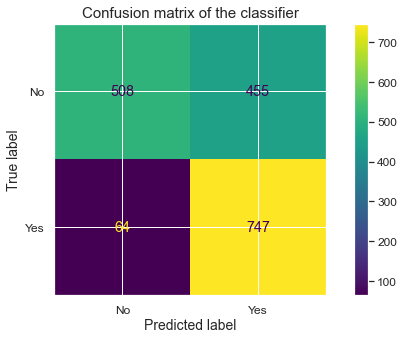

In [61]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=dt, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

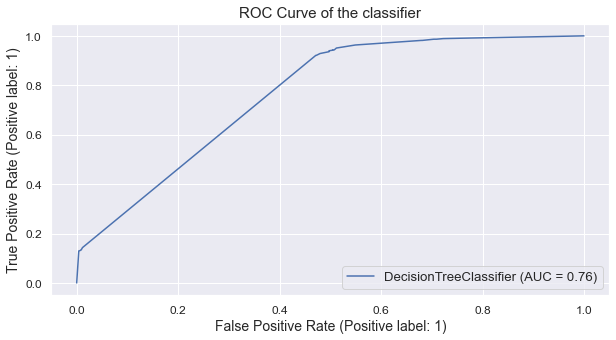

In [62]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=dt, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Plotting the tree

Next, let's examine the splits of the tree. We'll do this by using the `plot_tree()` function that we imported. We pass to it our fit model as well as some additional parameters. Note that if we did not set `max_depth=2`, the function would return a plot of the entire tree, all the way down to the leaf nodes. This is intractable and unnecessary. We're most interested in the splits nearest the root, because these tell us the most predictive features.

`class_names` displays what the majority class of each node is, and `filled` colors the nodes according to their majority class. 

Note that this plot represents how the tree grew from the _training data_. To make its predictions on the test data, the tree would simply pass each customer in the test data through its splits, from the root node all the way down to a leaf node.

In [63]:
X.columns

Index(['videoviewcount', 'videolikecount', 'videosharecount', 'videodownloadcount', 'textlength', 'claimstatus', 'banactive'], dtype='object')

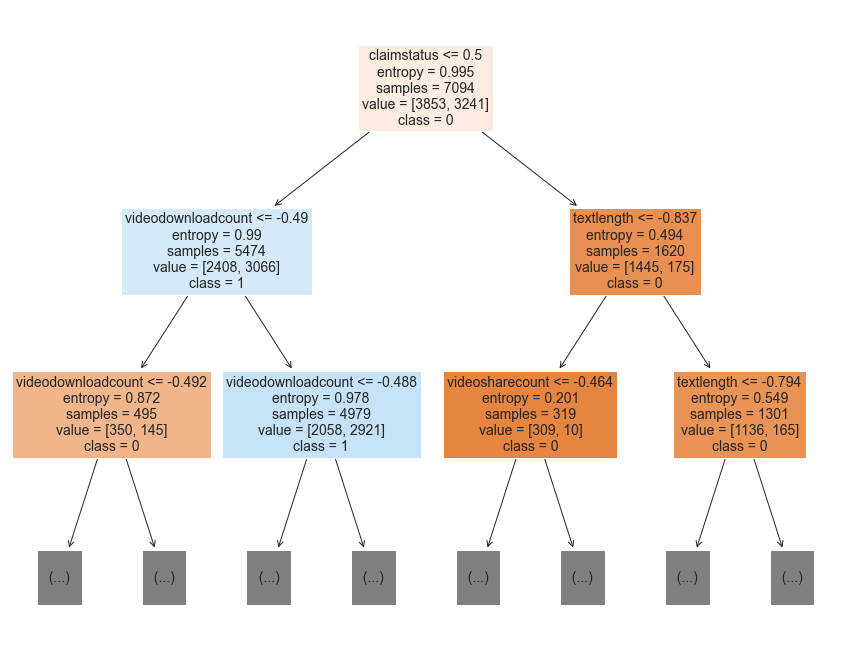

In [64]:
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=2, feature_names=X.columns,class_names=['0','1'], fontsize=14, filled=True)
plt.show()

How do we read this plot? The first line of information in each node is the feature and split point that the model identified as being most predictive. In other words, this is the question that is being asked at that split. For our root node, the question was: _Is the customer less than or equal to 42.5 years old?_

At each node, if the answer to the question it asks is "yes," the sample would move to the child node on the left. If the answer is "no," the sample would go to the child node on the right.

`gini` refers to the node's _Gini impurity_. This is a way of measuring how "pure" a node is. The value can range from 0 to 0.5. A Gini score of 0 means there is no impurity&mdash;the node is a leaf, and all of its samples are of a single class. A score of 0.5 means the classes are all equally represented in that node.

`samples` is simply how many samples are in that node, and `value` indicates how many of each class are in the node. Returning to the root node, we have `value = [5972, 1528]`. Notice that these numbers sum to 7,500, which is the number of samples in the node. This tells us that 5,972 customers in this node stayed (y=0) and 1,528 customers churned (y=1).

Lastly, we have `class`. This tells us the majority class of the samples in each node.

### Build a feature importance graph

Uncover which features might be most important to your decision tree model by building a feature importance graph. 

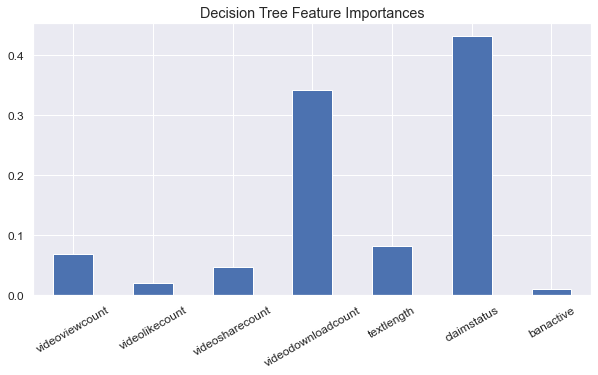

In [65]:
importances = dt.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()

feature_importances.plot.bar(ax=ax, figsize=(10,5))
ax.set_title("Decision Tree Feature Importances")
ax.tick_params('x', rotation=30)

fig.show()

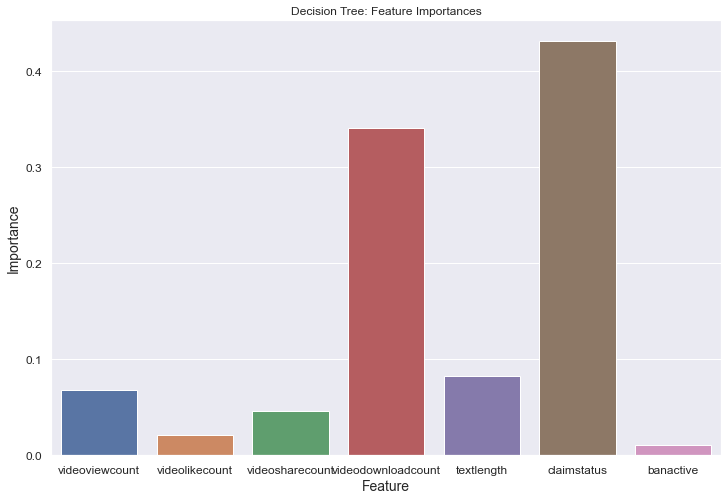

In [66]:
plt.figure(figsize=(12,8))

sns.barplot(x=feature_importances.index, y=feature_importances.values)
plt.title("Decision Tree: Feature Importances", fontsize=12)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

**=================================================================================================================**

## Random forest

### Using RandomSearchCV

In [67]:
# Instantiate the classifier
rf = RandomForestClassifier(random_state=0)

In [68]:
parameters = {'n_estimators':np.arange(100,300,100),
              'criterion': ('gini','entropy'),
              'max_depth': np.arange(2,11,2),
              'min_samples_split': np.arange(2,21,3),
              'min_samples_leaf': np.arange(5,21,5)
             }

In [69]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [70]:
rf_randm = RandomizedSearchCV(estimator=rf, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=-1, scoring=scoring, refit='roc_auc')

In [71]:
%%time
rf_randm.fit(X_random_train, y_random_train)

CPU times: total: 1.38 s
Wall time: 44.6 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([ 2,  4,  6,  8, 10]),
                                        'min_samples_leaf': array([ 5, 10, 15, 20]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20]),
                                        'n_estimators': array([100, 200])},
                   refit='roc_auc',
                   scoring={'f1', 'precision', 'recall', 'roc_auc', 'accuracy'})

In [72]:
rf_randm.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=200, random_state=0)

In [73]:
rf_randm.best_score_

0.7507652706645842

In [74]:
rf_randm.best_params_

{'n_estimators': 200,
 'min_samples_split': 11,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [75]:
# we also find the data for all models evaluated

results = pd.DataFrame(rf_randm.cv_results_)

print(results.shape)

results.head()

(55, 50)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.28,0.00,0.06,0.01,100,14,20,4,gini,"{'n_estimators': 100, 'min_samples_split': 14,...",0.71,0.71,0.71,0.69,0.70,0.70,0.01,27,0.61,0.62,0.61,0.63,0.61,0.62,0.01,33,0.85,0.83,0.84,0.76,0.82,0.82,0.03,26,0.70,0.76,0.71,0.73,0.73,0.72,0.02,40,0.67,0.68,0.66,0.67,0.67,0.67,0.01,48
1,0.28,0.01,0.05,0.00,100,17,15,6,gini,"{'n_estimators': 100, 'min_samples_split': 17,...",0.70,0.70,0.69,0.67,0.71,0.69,0.01,41,0.61,0.65,0.61,0.64,0.62,0.63,0.02,20,0.81,0.77,0.79,0.70,0.82,0.78,0.04,36,0.71,0.77,0.73,0.74,0.73,0.73,0.02,25,0.66,0.69,0.66,0.67,0.68,0.67,0.01,38
2,0.29,0.01,0.05,0.00,100,17,10,6,gini,"{'n_estimators': 100, 'min_samples_split': 17,...",0.71,0.72,0.69,0.68,0.71,0.70,0.02,30,0.62,0.65,0.61,0.64,0.63,0.63,0.01,17,0.83,0.82,0.78,0.73,0.82,0.80,0.04,33,0.71,0.78,0.73,0.74,0.74,0.74,0.02,14,0.67,0.70,0.66,0.68,0.68,0.68,0.01,10
3,0.59,0.01,0.09,0.00,200,17,15,10,gini,"{'n_estimators': 200, 'min_samples_split': 17,...",0.68,0.71,0.69,0.67,0.70,0.69,0.01,47,0.61,0.69,0.63,0.68,0.65,0.65,0.03,1,0.76,0.74,0.76,0.66,0.75,0.73,0.04,49,0.71,0.78,0.73,0.73,0.74,0.74,0.02,17,0.65,0.71,0.67,0.69,0.69,0.68,0.02,6
4,0.27,0.00,0.05,0.00,100,14,15,4,gini,"{'n_estimators': 100, 'min_samples_split': 14,...",0.70,0.71,0.71,0.69,0.70,0.70,0.01,33,0.59,0.63,0.60,0.62,0.61,0.61,0.01,52,0.85,0.81,0.87,0.79,0.82,0.83,0.03,23,0.70,0.76,0.71,0.74,0.73,0.73,0.02,37,0.65,0.68,0.66,0.67,0.67,0.66,0.01,55


In [76]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_n_estimators", "param_min_samples_split","param_max_depth", "param_min_samples_leaf", 
         "param_criterion", "mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_n_estimators,param_min_samples_split,param_max_depth,param_min_samples_leaf,param_criterion,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,200,11,10,5,entropy,0.69,0.77,0.65,0.70,0.75
1,200,20,8,5,gini,0.69,0.78,0.64,0.70,0.74
2,200,5,6,5,gini,0.68,0.82,0.63,0.71,0.74
3,100,2,6,5,gini,0.67,0.81,0.62,0.70,0.74
4,100,17,6,5,entropy,0.68,0.82,0.62,0.71,0.74


In [77]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [78]:
# Call the function on our model
rf_result_table = make_results("Random Forest RCV", rf_randm)

rf_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,Random Forest RCV,0.70,0.77,0.65,0.69,0.75


### Random Forest Model

In [79]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_split=8,
                            min_samples_leaf=5, random_state=0)

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=8, random_state=0)

In [81]:
rf_pred = rf.predict(X_test)

In [82]:
rf_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### K-Fold Validation

In [83]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [84]:
cv = cross_validate(estimator=rf, X=X_train, y=y_train, scoring=["roc_auc","recall"], cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([1.0960474 , 1.11416483, 0.9955976 , 0.96748924, 0.87809634]),
 'score_time': array([0.07090235, 0.07294178, 0.05021238, 0.06023645, 0.0582974 ]),
 'test_roc_auc': array([0.79045383, 0.83197372, 0.81701843, 0.82056001, 0.79891782]),
 'train_roc_auc': array([0.8882156 , 0.89074095, 0.88786994, 0.88833091, 0.88340247]),
 'test_recall': array([0.85758998, 0.87066246, 0.85179641, 0.90595611, 0.85498489]),
 'train_recall': array([0.92582629, 0.92136555, 0.90866693, 0.93276988, 0.91392012])}

In [85]:
cv["train_roc_auc"].mean()

0.8877119754455964

In [86]:
cv["test_roc_auc"].mean()

0.811784761894207

### RF Model Evaluation

In [87]:
rfcm = confusion_matrix(y_test,rf_pred)
rfcm

array([[570, 393],
       [ 81, 730]], dtype=int64)

In [88]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71       963
           1       0.65      0.90      0.75       811

    accuracy                           0.73      1774
   macro avg       0.76      0.75      0.73      1774
weighted avg       0.77      0.73      0.73      1774



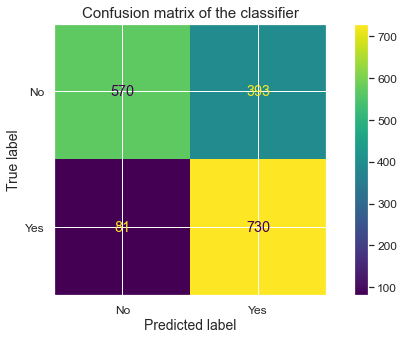

In [89]:
fig, ax = plt.subplots(figsize=(10,5))

ConfusionMatrixDisplay.from_estimator(estimator=rf, X=X_test, y=y_test, ax=ax, display_labels=["No","Yes"])
ax.set_title('Confusion matrix of the classifier', size=15)

plt.show()

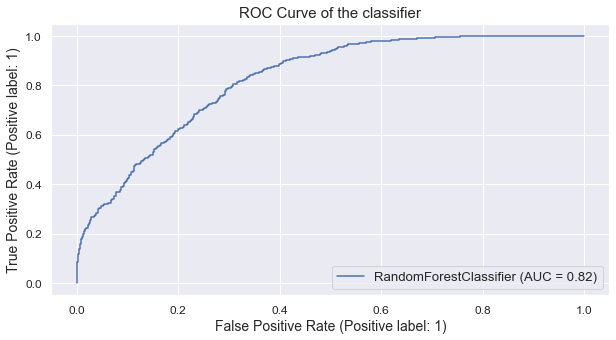

In [90]:
fig, ax = plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(estimator=rf, X=X_test, y=y_test, ax=ax)
ax.set_title('ROC Curve of the classifier', size=15)

plt.show()

### Build a feature importance graph

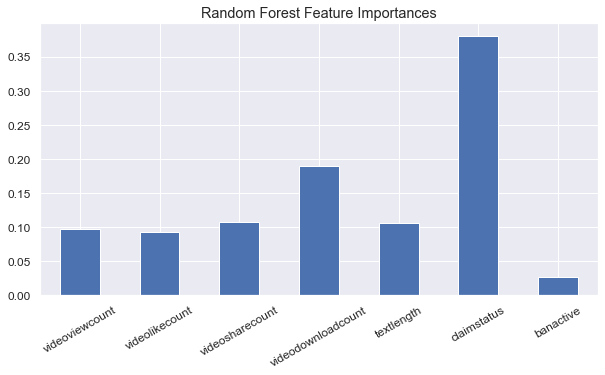

In [91]:
importances = rf.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax, figsize=(10,5))

ax.set_title("Random Forest Feature Importances")
ax.tick_params('x', rotation=30)

fig.show()

**=================================================================================================================**

## HistGradientBoostingClassifier

### Using RandomSearchCV

In [92]:
hgbc = HistGradientBoostingClassifier(early_stopping='auto', scoring='roc_auc', random_state=0)

In [93]:
parameters = {'loss' : ('auto', 'binary_crossentropy', 'categorical_crossentropy'),
              'learning_rate': np.arange(0.0,1.1,0.2),
              'max_depth': np.arange(2,10,2),
              'min_samples_leaf': np.arange(5,21,5)
             }

In [94]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [95]:
hgbc_randm = RandomizedSearchCV(estimator=hgbc, param_distributions = parameters, cv = 5, n_iter = 55, 
                           n_jobs=2, scoring=scoring, refit='roc_auc', return_train_score=True)

In [96]:
%%time
hgbc_randm.fit(X_random_train, y_random_train)

CPU times: total: 3.33 s
Wall time: 32.4 s


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=0,
                                                            scoring='roc_auc'),
                   n_iter=55, n_jobs=2,
                   param_distributions={'learning_rate': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'loss': ('auto', 'binary_crossentropy',
                                                 'categorical_crossentropy'),
                                        'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([ 5, 10, 15, 20])},
                   refit='roc_auc', return_train_score=True,
                   scoring={'f1', 'precision', 'recall', 'roc_auc', 'accuracy'})

In [97]:
hgbc_randm.best_estimator_

HistGradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                               min_samples_leaf=10, random_state=0,
                               scoring='roc_auc')

In [98]:
hgbc_randm.best_score_

0.7789048389088664

In [99]:
hgbc_randm.best_params_

{'min_samples_leaf': 10, 'max_depth': 8, 'loss': 'auto', 'learning_rate': 0.2}

In [100]:
# we also find the data for all models evaluated

results = pd.DataFrame(hgbc_randm.cv_results_)

print(results.shape)

results.head()

(55, 84)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_loss,param_learning_rate,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.68,0.01,0.03,0.00,5,8,auto,0.20,"{'min_samples_leaf': 5, 'max_depth': 8, 'loss'...",0.67,0.71,0.69,0.61,0.73,0.68,0.04,8,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.66,0.68,0.68,0.64,0.73,0.68,0.03,7,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.68,0.74,0.71,0.59,0.73,0.69,0.05,9,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.75,0.80,0.78,0.73,0.80,0.77,0.03,3,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.68,0.71,0.70,0.64,0.75,0.70,0.03,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
1,0.34,0.01,0.02,0.00,20,6,auto,0.60,"{'min_samples_leaf': 20, 'max_depth': 6, 'loss...",0.63,0.73,0.65,0.62,0.71,0.67,0.04,19,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.63,0.71,0.65,0.64,0.70,0.67,0.03,16,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.63,0.75,0.64,0.60,0.73,0.67,0.06,19,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.71,0.79,0.74,0.73,0.79,0.75,0.03,24,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.65,0.73,0.67,0.65,0.72,0.68,0.04,21,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,0.42,0.01,0.03,0.00,10,6,auto,0.60,"{'min_samples_leaf': 10, 'max_depth': 6, 'loss...",0.66,0.72,0.67,0.62,0.72,0.68,0.04,10,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.63,0.69,0.65,0.64,0.72,0.67,0.03,21,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.68,0.76,0.69,0.59,0.72,0.69,0.05,10,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.72,0.80,0.76,0.76,0.80,0.77,0.03,11,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.66,0.72,0.67,0.65,0.73,0.69,0.03,16,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,0.46,0.02,0.03,0.00,10,6,binary_crossentropy,1.00,"{'min_samples_leaf': 10, 'max_depth': 6, 'loss...",0.65,0.71,0.68,0.67,0.71,0.68,0.02,6,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.65,0.67,0.67,0.68,0.71,0.68,0.02,8,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.65,0.75,0.70,0.65,0.71,0.69,0.04,7,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.72,0.79,0.77,0.75,0.80,0.77,0.03,12,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.67,0.70,0.69,0.69,0.72,0.69,0.02,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,0.24,0.00,0.02,0.00,15,4,auto,1.00,"{'min_samples_leaf': 15, 'max_depth': 4, 'loss...",0.66,0.69,0.63,0.63,0.70,0.66,0.03,28,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.65,0.67,0.63,0.67,0.68,0.66,0.02,24,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.68,0.70,0.63,0.59,0.71,0.66,0.05,27,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.73,0.77,0.73,0.74,0.78,0.75,0.02,27,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.67,0.69,0.65,0.66,0.70,0.68,0.02,26,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [101]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_roc_auc', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[["param_loss", "param_max_depth", "param_min_samples_leaf", 
         "param_learning_rate", "mean_test_accuracy", "mean_test_recall",
         "mean_test_precision","mean_test_f1","mean_test_roc_auc"]].head()

,param_loss,param_max_depth,param_min_samples_leaf,param_learning_rate,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1,mean_test_roc_auc
0,auto,8,10,0.20,0.71,0.71,0.69,0.70,0.78
1,auto,4,10,0.20,0.70,0.72,0.68,0.70,0.78
2,auto,8,5,0.20,0.70,0.69,0.68,0.68,0.77
3,auto,2,5,0.60,0.69,0.67,0.67,0.67,0.77
4,binary_crossentropy,2,5,0.60,0.69,0.67,0.67,0.67,0.77


In [102]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    rocauc = best_estimator_results.mean_test_roc_auc
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy,
                        'ROC-AUC' : rocauc  
                        },
                        ignore_index=True
                       )
  
    return table

In [103]:
# Call the function on our model
hist_result_table = make_results("HistGradientBoostingClassifier RCV", hgbc_randm)

hist_result_table

,Model,F1,Recall,Precision,Accuracy,ROC-AUC
0,HistGradientBoostingClassifier RCV,0.70,0.71,0.69,0.71,0.78


### HistGradientBoosting Model

In [104]:
hgbc = HistGradientBoostingClassifier(min_samples_leaf=10, max_depth=4, loss='binary_crossentropy',
                                     learning_rate=0.4, early_stopping='auto', scoring='roc_auc', random_state=0)

In [105]:
hgbc.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.4, loss='binary_crossentropy',
                               max_depth=4, min_samples_leaf=10, random_state=0,
                               scoring='roc_auc')

In [106]:
hgbc_pred = hgbc.predict(X_test)

In [107]:
hgbc_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### K-Fold Validation

In [108]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [109]:
cv = cross_validate(estimator=hgbc, X=X_train, y=y_train, scoring=["roc_auc","recall"], cv=kf, n_jobs=2, return_train_score=True)
cv

{'fit_time': array([0.36096239, 0.36096239, 0.36402726, 0.36200237, 0.2468698 ]),
 'score_time': array([0.03014827, 0.02813292, 0.0301218 , 0.0301218 , 0.01561975]),
 'test_roc_auc': array([0.88073111, 0.89691776, 0.89203417, 0.89131168, 0.87547355]),
 'train_roc_auc': array([0.97946028, 0.9758788 , 0.97476497, 0.97282101, 0.9768692 ]),
 'test_recall': array([0.78716745, 0.79337539, 0.78293413, 0.78840125, 0.78096677]),
 'train_recall': array([0.91583397, 0.91791331, 0.89817334, 0.917403  , 0.91120589])}

In [110]:
cv["train_roc_auc"].mean()

0.975958852418087

In [111]:
cv["test_roc_auc"].mean()

0.8872936549477176

### Build a feature importance graph

In [112]:
permimpt = permutation_importance(estimator=hgbc, X=X_train, y=y_train, scoring="roc_auc", n_repeats=5,
                       n_jobs=None, random_state=0)

permimpt

{'importances_mean': array([0.16990349, 0.13504993, 0.11059231, 0.23507472, 0.08944403,
        0.11217972, 0.00597464]),
 'importances_std': array([0.00375027, 0.00428664, 0.001629  , 0.00238304, 0.00171635,
        0.00396054, 0.00045031]),
 'importances': array([[0.17046247, 0.166855  , 0.17411862, 0.17359374, 0.16448761],
        [0.13574667, 0.13111823, 0.13087763, 0.14269634, 0.13481074],
        [0.11061325, 0.10798347, 0.11050574, 0.11312911, 0.11073   ],
        [0.23563073, 0.23455258, 0.23328789, 0.23255388, 0.23934851],
        [0.08984344, 0.08771901, 0.09215554, 0.09003199, 0.0874702 ],
        [0.11017918, 0.1120912 , 0.11577081, 0.10593347, 0.11692396],
        [0.00644505, 0.00555881, 0.00572229, 0.00659143, 0.0055556 ]])}

In [113]:
hgbc_importances = pd.Series(data=permimpt["importances_mean"], index=X.columns)
hgbc_sorted = hgbc_importances.sort_values(ascending=False)

hgbc_sorted

videodownloadcount   0.24
videoviewcount       0.17
videolikecount       0.14
claimstatus          0.11
videosharecount      0.11
textlength           0.09
banactive            0.01
dtype: float64

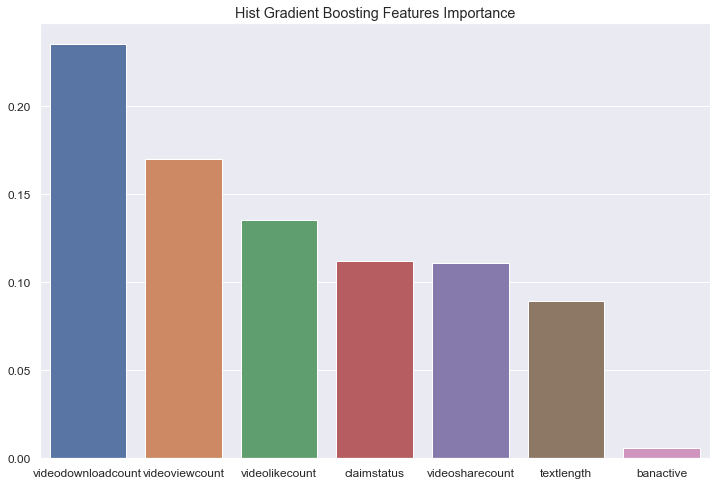

In [114]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(hgbc_sorted.index, hgbc_sorted.values)

ax.set_title("Hist Gradient Boosting Features Importance")
plt.show()

#### Python code done by Dennis Lam